In [3]:
!pip install CosmoloPy

     |████████████████████████████████| 163kB 2.8MB/s 


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cosmolopy.distance as cd
import scipy as sc
#Supernova JL

In [0]:
!wget -cq https://raw.githubusercontent.com/DCIDA2019/da2020-Physicworld/master/datos/jla_lcparams.txt
!wget -cq https://raw.githubusercontent.com/DCIDA2019/da2020-Physicworld/master/datos/jla_v0_covmatrix.dat
!wget -cq https://raw.githubusercontent.com/DCIDA2019/da2020-Physicworld/master/datos/jla_v0a_covmatrix.dat
!wget -cq https://raw.githubusercontent.com/DCIDA2019/da2020-Physicworld/master/datos/jla_v0b_covmatrix.dat
!wget -cq https://raw.githubusercontent.com/DCIDA2019/da2020-Physicworld/master/datos/jla_va_covmatrix.dat
!wget -cq https://raw.githubusercontent.com/DCIDA2019/da2020-Physicworld/master/datos/jla_vab_covmatrix.dat
!wget -cq https://raw.githubusercontent.com/DCIDA2019/da2020-Physicworld/master/datos/jla_vb_covmatrix.dat

In [0]:
data = pd.read_csv("jla_lcparams.txt", encoding='Latin-1', sep=" ")
data = pd.DataFrame(data)

data_v0 = pd.read_csv("jla_v0_covmatrix.dat", encoding='Latin-1')
data_v0 = pd.DataFrame(data_v0)

data_v0a = pd.read_csv("jla_v0a_covmatrix.dat", encoding='Latin-1')
data_v0a = pd.DataFrame(data_v0a)

data_v0b = pd.read_csv("jla_v0b_covmatrix.dat", encoding='Latin-1')
data_v0b = pd.DataFrame(data_v0b)

data_va = pd.read_csv("jla_va_covmatrix.dat", encoding='Latin-1')
data_va = pd.DataFrame(data_va)

data_vab = pd.read_csv("jla_vab_covmatrix.dat", encoding='Latin-1')
data_vab = pd.DataFrame(data_vab)

data_vb = pd.read_csv("jla_vb_covmatrix.dat", encoding='Latin-1')
data_vb = pd.DataFrame(data_vb)

In [0]:
zcmb = data["zcmb"]
mb = data["mb"]
x1 =  data["x1"]
C = data["color"]

In [148]:
matriz_cov = data_v0 + data_v0a + data_v0b + data_va + data_vab + data_vb
matriz_cov = matriz_cov.values.reshape(740,740)
matriz_cov

array([[ 8.64227232e-03,  7.34445918e-03,  1.59175379e-03, ...,
        -7.35925479e-05,  1.57848688e-04,  8.31412847e-05],
       [ 7.34445918e-03,  8.22700390e-03,  6.33430942e-04, ...,
         9.73553245e-05,  1.82973146e-04,  1.42323217e-04],
       [ 1.59175379e-03,  6.33430942e-04,  2.85901885e-03, ...,
        -9.49003304e-05,  4.33578535e-04,  3.39830211e-04],
       ...,
       [-7.35925479e-05,  9.73553245e-05, -9.49003304e-05, ...,
         1.39469374e-02,  2.37650462e-04,  1.98289725e-03],
       [ 1.57848688e-04,  1.82973146e-04,  4.33578535e-04, ...,
         2.37650462e-04,  1.10683209e-02, -1.43105434e-03],
       [ 8.31412847e-05,  1.42323217e-04,  3.39830211e-04, ...,
         1.98289725e-03, -1.43105434e-03,  5.74500001e-03]])

In [0]:
def mu_exp(Mb, alpha, beta):
  u = mb - (Mb - alpha * x1 + beta * C)
  return u

In [0]:
def mu_teo(omega_m):
  cosmo = {'omega_M_0':omega_m, 'omega_lambda_0':0.7, 'omega_k_0':0.0, 'h':0.7}
  lumdist = 5 * np.log10(cd.luminosity_distance(zcmb,**cosmo)*1e6/10)
  return lumdist

In [0]:
#theta = []; Mb, alpha, beta, omega_m
def chisquare(theta):
  mu_te = mu_teo(theta[3])
  mu_ob = mu_exp(theta[0], theta[1], theta[2])
  chi = abs(np.matmul((mu_ob - mu_te).T, np.matmul(matriz_cov, (mu_ob - mu_te))))
  return chi

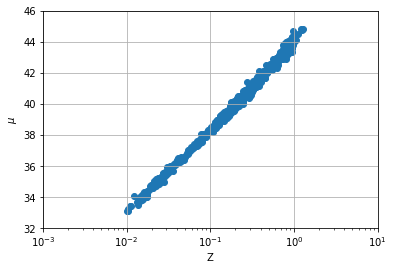

In [152]:
mu_obs = mu_exp(-19.05, 0.141, 3.01)
plt.scatter(zcmb, mu_obs)

plt.ylabel("$\mu$")
plt.xlabel("Z")
plt.xscale('log')
plt.xlim(0.001, 10)
plt.grid()
plt.ylim(32,46)
plt.show()

In [0]:
cosmo = {'omega_M_0':0.3, 'omega_lambda_0':0.7, 'omega_k_0':0.0, 'h':0.7}
lumdist = 5 * np.log10(cd.luminosity_distance(zcmb,**cosmo)*1e6/10)

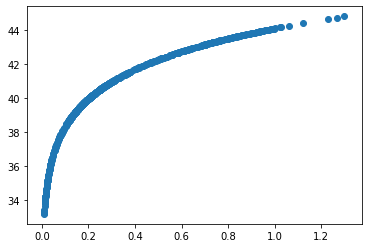

In [154]:
plt.scatter(zcmb, lumdist)
plt.show()

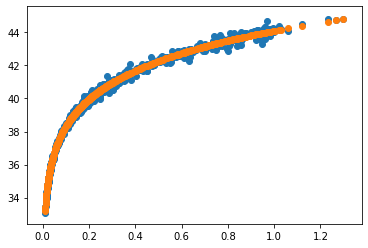

In [155]:
plt.scatter(zcmb, mu_obs)
plt.scatter(zcmb, lumdist)
plt.show()

<ErrorbarContainer object of 3 artists>

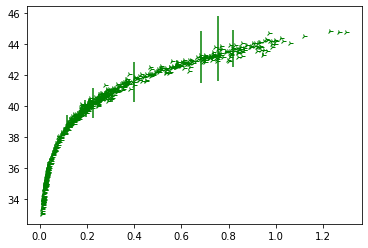

In [156]:
matrix_error = []

for i in range(740):
  matrix_error.append(matriz_cov[i][i])

plt.errorbar(zcmb, mu_obs, yerr=matrix_error, marker = '4', c = 'green',linestyle='None')

In [157]:
theta = [-19.05, 0.141, 3.01, 0.3]
chisquare(theta)

2.6682319598192925

In [158]:
sc.optimize.minimize(chisquare, theta,bounds = ((0, 1), (2.5, 3.5), (-19.5, -18.5), (0, 1)))

      fun: 638617.8983608879
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 67464.70462531,   3185.39096043,  -1322.51298055, -48431.92873523])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 10
      nit: 1
   status: 0
  success: True
        x: array([  0. ,   2.5, -18.5,   1. ])